<a href="https://colab.research.google.com/github/juimdpp/cca-final-project/blob/main/CCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCA Project: Topic 1

## 1. Load Datasets

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load breast cancer datasets
cancer = datasets.load_breast_cancer()
# cancer

In [83]:
# Load dataset into pandas dataframe
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
print("No. of samples:", len(cancer.data), "\tNo. of features:", len(cancer.feature_names))
# print("Features: ", df.columns)
df.head(5)

No. of samples: 569 	No. of features: 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Correlation
Analyze the correlation between features by separating the feature columns and plotting graphs to oberve the relationship between individual features.

In [84]:
# print(df.columns) # Show feature list

# Separate feature columns into mean, error and worst
feature_mean = list(df.columns[0:10])
feature_error = list(df.columns[10:20])
feature_worst = list(df.columns[20:])

### Correlation Plots

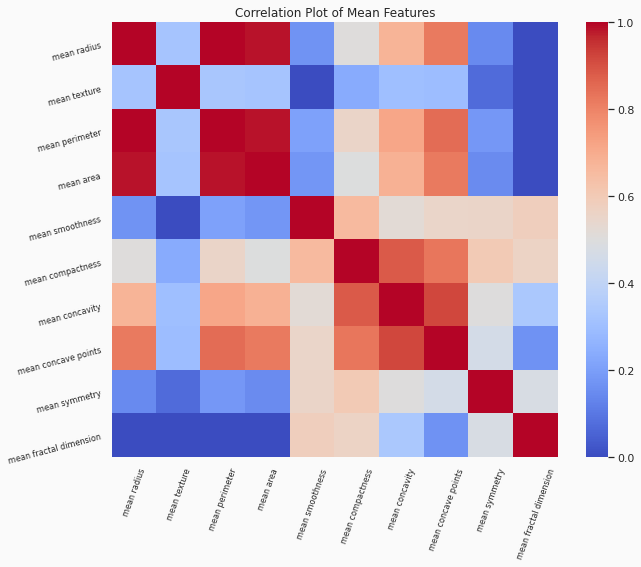

In [85]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot feature correlations using heatmap
def corr_heatmap(feature_list, feature_name):
  mean_corr = df[feature_list].corr()
  fig=plt.figure(figsize=(10,8))
  fig.patch.set_facecolor('#fafafa')
  plt.tight_layout()
  g = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
  g.set_xticklabels(g.get_xticklabels(), rotation=70, fontsize=8)
  g.set_yticklabels(g.get_yticklabels(), rotation=15, fontsize=8)
  plt.title(f"Correlation Plot of {feature_name} Features")
  plt.savefig(f"Corr_{feature_name}_Features.png", dpi=50)
  plt.show()

# Show heatmaps for feature types
plt_mean = corr_heatmap(feature_mean, 'Mean')

# Strong correlation between perimeter, area and radius features

## 2. Split Data into Training Sets

In [86]:
# Global variables
num_train = 0.2 # length of training set
random_state = 30

# Chart background color
background_color = '#fafafa'

In [87]:
from sklearn.model_selection import train_test_split

cancer_x = cancer.data
cancer_y = cancer.target

# split data into training and test sets

# cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size = num_train, shuffle=False)
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size=num_train, stratify=cancer_y, random_state=random_state)

print("Training set: ", cancer_x_train.shape)
print("Test set: ", cancer_x_test.shape)

Training set:  (455, 30)
Test set:  (114, 30)


## 3. PCA Dimension Reduction

In [88]:
# Global variables and parameters
n_components = 4 # num of principal components
variance = 0.85 # min percentage of variance that needs to be explained 

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
cancer_x_std = StandardScaler().fit_transform(cancer_x)
# std_df = pd.DataFrame(cancer_x, columns = cancer.feature_names)
# std_df

In [90]:
# Apply PCA
cancer_pca = PCA(variance) 
cancer_pca_scaled = cancer_pca.fit_transform(cancer_x_std)
print("Shape of scaled and 'PCA'ed features: ", np.shape(cancer_pca_scaled))

Shape of scaled and 'PCA'ed features:  (569, 6)


In [91]:
# Find variance of principal components
feat_var = np.var(cancer_pca_scaled, axis=0)
feat_var_rat = feat_var/np.sum(feat_var)

print(f"Variance Ratio:\t\t", feat_var_rat)
print(f"Variance Retained:\t", np.cumsum(feat_var_rat))

Variance Ratio:		 [0.49879029 0.21373861 0.10582797 0.07438288 0.06191802 0.04534223]
Variance Retained:	 [0.49879029 0.7125289  0.81835687 0.89273975 0.95465777 1.        ]


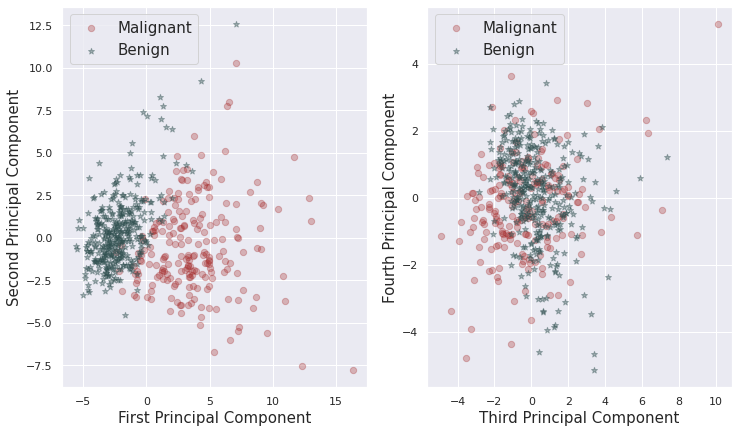

In [92]:
# Plot components to see how separated samples are
cancer_target_list = cancer_y.tolist()

feature_scaled_pca_X0 = cancer_pca_scaled[:, 0]
feature_scaled_pca_X1 = cancer_pca_scaled[:, 1]
feature_scaled_pca_X2 = cancer_pca_scaled[:, 2]
feature_scaled_pca_X3 = cancer_pca_scaled[:, 3]

labels = cancer_target_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Malignant', 1:'Benign'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()

First and Second principal components play more significant roles in classifying Malignant/Benign samples

## 4. SVM Hyperparameter Tuning



### 4.1 Pipeline & Grid-Search Cross Validation

In [93]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Pipeline steps: Standard Scaler, PCA, SVM
pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SVM', SVC(kernel='rbf'))]

"""
Grid/range of param values to check in hyperparameter tuning
Tuning params
PCA: n_components
SVM: C (regularization), gamma 
"""
C_range = [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000]
gamma_range = [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
grid_params={
    'pca__n_components': [2],
    'SVM__C': C_range,
    'SVM__gamma': gamma_range,
}

pipeline = Pipeline(pipe_steps)

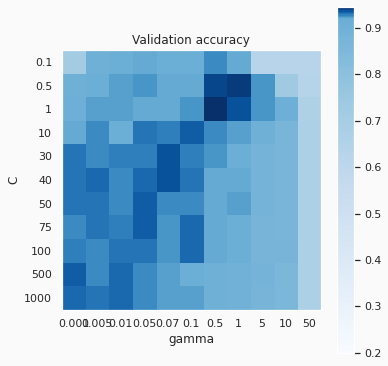

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap

cv = StratifiedShuffleSplit(n_splits=5, test_size=num_train, random_state=random_state)
grid = GridSearchCV(pipeline, param_grid=grid_params, cv=cv)
grid.fit(cancer_x_train, cancer_y_train)

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))
# print(scores)

class MidpointNormalize(Normalize):
  def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
    self.midpoint = midpoint
    Normalize.__init__(self, vmin, vmax, clip)

  def __call__(self, value, clip=None):
    x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
    return np.ma.masked_array(np.interp(value, x, y))

# Plot heatmap
fig = plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
fig.patch.set_facecolor(background_color)
plt.ylabel('C')
plt.colorbar()
plt.grid(b=None)
plt.xticks(np.arange(len(gamma_range)), gamma_range)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()


### 4.2 Grid-Search Cross Validation
tqdm outputs a smart progress bar by wrapping around any iterable to show you how much time has elapsed, and the estimated time remaining for the iterable.


In [95]:
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

import builtins
range = builtins.range  # Get back the original method

print("Start Fitting Training Data")
# Perform GridSearchCV using k-fold cross validation
for cv in tqdm(range(3, 7)):
  create_grid = GridSearchCV(pipeline, param_grid=grid_params, cv=cv)
  create_grid.fit(cancer_x_train, cancer_y_train)
  print(f"Score for {cv} fold CV := {create_grid.score(cancer_x_test, cancer_y_test)}")
  print("===== Best-fit Parameters From Training Data =====")
  print(create_grid.best_params_)

print("Done!")
print(f"\nBest params: {create_grid.best_params_}")

Start Fitting Training Data


Score for 3 fold CV := 0.956140350877193
===== Best-fit Parameters From Training Data =====
{'SVM__C': 100, 'SVM__gamma': 0.001, 'pca__n_components': 2}
Score for 4 fold CV := 0.956140350877193
===== Best-fit Parameters From Training Data =====
{'SVM__C': 30, 'SVM__gamma': 0.001, 'pca__n_components': 2}
Score for 5 fold CV := 0.956140350877193
===== Best-fit Parameters From Training Data =====
{'SVM__C': 30, 'SVM__gamma': 0.001, 'pca__n_components': 2}
Score for 6 fold CV := 0.9210526315789473
===== Best-fit Parameters From Training Data =====
{'SVM__C': 1, 'SVM__gamma': 0.5, 'pca__n_components': 2}

Done!

Best params: {'SVM__C': 1, 'SVM__gamma': 0.5, 'pca__n_components': 2}


## 5. SVM Implementation
Based on the best params from GridSearchCV, we apply SVC on the test data set.
### 5.1 2D Decision Boundary

In [96]:
"""
Standard Scaler
PCA: 2 components
SVM with best grid fit params 
"""
kernel='rbf' # Radial basis function 
C=float(create_grid.best_params_['SVM__C']) 
gamma=float(create_grid.best_params_['SVM__gamma'])
n_components=create_grid.best_params_['pca__n_components'] 

In [97]:
pca = PCA(n_components) 

# PCA on test dataset
cancer_x_test_std = StandardScaler().fit_transform(cancer_x_test)
cancer_x_test_scaled = pca.fit_transform(cancer_x_test_std)

# PCA on training dataset
cancer_x_train_std = StandardScaler().fit_transform(cancer_x_train)
cancer_x_train_scaled = pca.fit_transform(cancer_x_train_std)
# cancer_x_train_scaled

In [98]:
"""
Check SVM validation accuracy for different C and gamma values
"""
# Calculate svm validation accuracy for each C and gamma in given range
classifiers = []
for C in C_range:
  for gamma in gamma_range:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(cancer_x_train_scaled, cancer_y_train)
    classifiers.append((C, gamma, clf))


In [99]:
# Perform SVM
svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
classify_train = svm_model.fit(cancer_x_train_scaled, cancer_y_train)
# classify_test = svm_model.fit(cancer_x_test_scaled, cancer_y_test)
# classify

In [100]:
# Plot styling
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

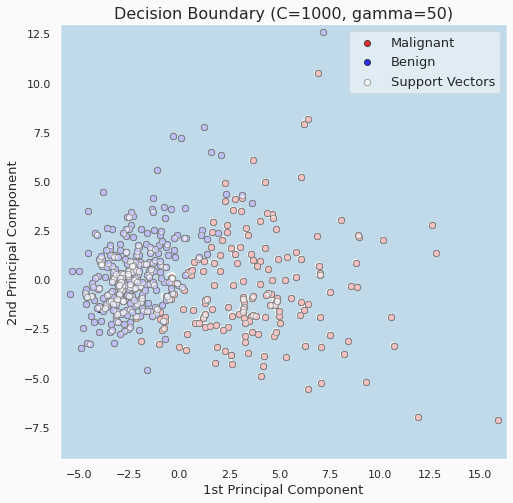

In [101]:
# Plot Decision Boundary
def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  out = ax.contourf(xx, yy, Z, **params)
  return out

def make_meshgrid(x, y, h=0.1):
  x_min, x_max = x.min() - .5, x.max() + .5
  y_min, y_max = y.min() - 2, y.max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h)
                       #,np.arange(z_min, z_max, h)
                       )
  return xx, yy


def plt_boundary(X_train_scaled, Y_train, classify, fig_size=8, font_size=13, g=gamma, C=C, hide_axes=False):
  X0, X1 = X_train_scaled[:, 0], X_train_scaled[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  fig, ax = plt.subplots(figsize=(fig_size, fig_size))  
  fig.patch.set_facecolor(background_color)
  cdict1={0: cm_bright.colors[0], 1: cm_bright.colors[1]}

  target_y_list = Y_train.tolist()
  yl1 = [int(target1) for target1 in target_y_list]
  labels1 = yl1

  label1 = {0: 'Malignant', 1: 'Benign'}
  marker1 = {0: 'o', 1: 'o'}#{0: '*', 1: 'd'}
  alpha1 = {0: 0.8, 1: 0.8}

  plot_contours(ax, classify, xx, yy, cmap=cm, alpha=.8)

  for i in np.unique(labels1):
    ix1 = np.where(labels1==i)
    ax.scatter(X0[ix1], X1[ix1], c=cdict1[i],# s=70, 
               label=label1[i], marker=marker1[i], alpha=alpha1[i],
               cmap=cm_bright, edgecolors='k')

  ax.scatter(
      svm_model.support_vectors_[:, 0], 
      svm_model.support_vectors_[:, 1], 
      s=40, 
      facecolors='white',
      edgecolors='grey',
      alpha=0.7, 
      label='Support Vectors'
      )

  plt.legend(facecolor='white', fontsize=font_size, framealpha=0.5)
  plt.title(f'Decision Boundary (C={C}, gamma={g})', fontsize=font_size+3)
  if not hide_axes:
    plt.xlabel('1st Principal Component', fontsize=font_size)
    plt.ylabel('2nd Principal Component', fontsize=font_size)
  else:
    plt.axis('off')
  plt.grid(b=None)
  plt.show()

plt_boundary(cancer_x_train_scaled, cancer_y_train, classify_train)

### SVM plots for different hyperparameters

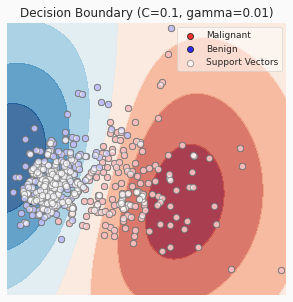

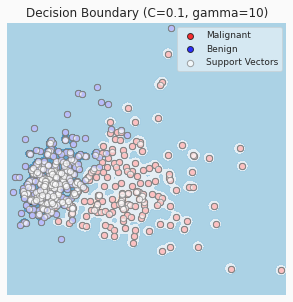

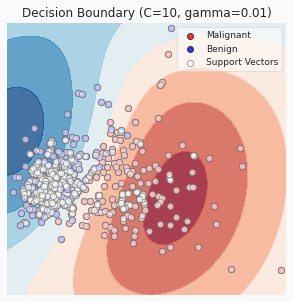

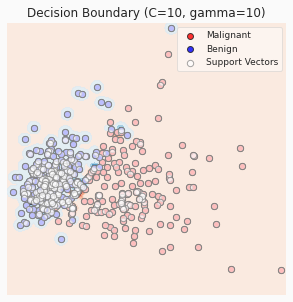

In [102]:
# Perform SVM for different hyperparameters

# Narrow range of C and gamma values to plot SVM
C_range_small = [0.1, 10] 
gamma_range_small = [0.01, 10] 

font_size = 9
fig_size = 5

for c in C_range_small:
  for g in gamma_range_small:
    svm = SVC(kernel=kernel, C=c, gamma=g)
    clf = svm.fit(cancer_x_train_scaled, cancer_y_train)

    plt_boundary(cancer_x_train_scaled, cancer_y_train, clf, fig_size, font_size, g, c, True)

### 5.2 Prediction and Analysis
### Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

In [103]:
# Prediction
# Make predictions based on training data
cancer_y_pred = classify_train.predict(cancer_x_test_scaled)

print(classify_train.score(cancer_x_test_scaled, cancer_y_test))

0.6842105263157895


              precision    recall  f1-score   support

           0       0.88      0.17      0.28        42
           1       0.67      0.99      0.80        72

    accuracy                           0.68       114
   macro avg       0.77      0.58      0.54       114
weighted avg       0.75      0.68      0.61       114



Text(0.5, 1.0, 'Confusion Matrix')

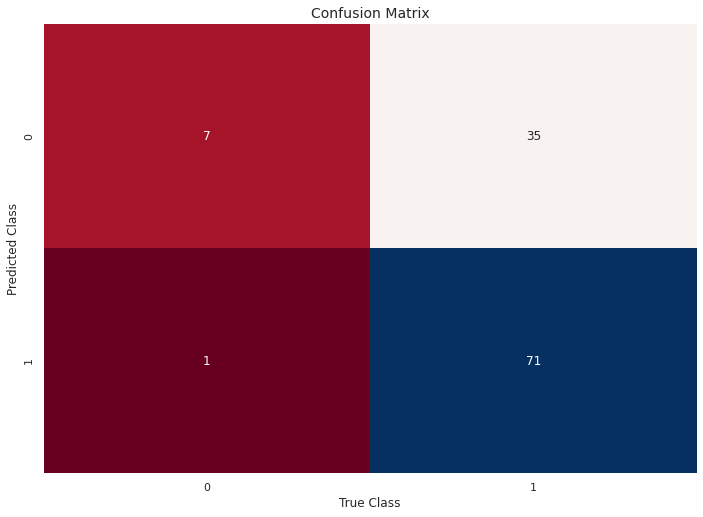

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(cancer_y_test, cancer_y_pred))


# Confusion matrix
cm = confusion_matrix(cancer_y_test, cancer_y_pred)

df_cm = pd.DataFrame(cm)

sns.heatmap(df_cm, annot=True, cbar=False, cmap=plt.cm.RdBu)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title("Confusion Matrix", fontsize=14)